# Plots the DFT ground state energy of the combined hBN-water system as a function of plane wave energy cutoff.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [53]:
def make_df(data_path, ryd_per_ev=0.0734986176, mev_per_ev=1000):
    df = pd.read_table(
        data_path,
        delim_whitespace=True,
        header=None,
        names=[
            "system",
            "functional",
            "ecp",
            "ecut_ev",
            "Nk",
            "Ns",
            "total_energy_ryd",
        ],
    )
    df["total_energy_ev"] = df["total_energy_ryd"].values / ryd_per_ev
    df["total_energy_mev"] = df["total_energy_ev"].values * mev_per_ev
    return df


def plot_basis_set_extrapolation(
    df, basis_sizes, int_energies, plot_int_energy=True
):
    functional = df["functional"].values[0]
    ecp = df["ecp"].values[0]
    Nk = df["Nk"].values[0]
    Ns = df["Ns"].values[0]
    plt.figure(figsize=(5, 5))
    plt.title(
        f"Basis set extrapolation for hBN-water system"
        + f"\n {functional}, {ecp}, {Nk}x{Nk}x1 k-mesh, {Ns}x{Ns}x1 supercell"
    )
    plt.xlabel(r"Plane wave E$_{cut}$ (eV)")
    if plot_int_energy:
        plt.ylabel("DFT interaction energy (meV)")
        plt.plot(
            basis_sizes,
            int_energies,
            linestyle="solid",
            marker="o",
        )
        save_path = "/Users/Nathan/Desktop/basis_set_extrapolation_int_energy.png"
    else:
        df = df[df.system == "hBN_water_Oup_Hdown"]
        plt.ylabel("DFT total energy (eV)")
        plt.plot(
            "ecut_ev",
            "total_energy_ev",
            data=df,
            linestyle="solid",
            marker="o",
        )
        save_path = "/Users/Nathan/Desktop/basis_set_extrapolation_total_energy.png"
    print(f"Saving png file to {save_path}")
    plt.savefig(save_path, dpi=300, bbox_inches="tight")


def compute_int_energy(df):
    basis_sizes = df.ecut_ev.unique()
    int_energies = []
    for basis_size in basis_sizes:
        hBN_water_energy = df[
            (df.ecut_ev == basis_size) & (df.system == "hBN_water_Oup_Hdown")
        ]["total_energy_mev"].values[0]
        hBN_energy = df[(df.ecut_ev == basis_size) & (df.system == "hBN")][
            "total_energy_mev"
        ].values[0]
        water_energy = df[(df.ecut_ev == basis_size) & (df.system == "water_Oup_Hdown")]["total_energy_mev"].values[0]
        int_energy = hBN_water_energy - hBN_energy - water_energy
        int_energies.append(int_energy)
    int_energies = np.array(int_energies)
    return basis_sizes, int_energies

In [58]:
data_path = "total_energy_data.txt"
df = make_df(data_path)
df

,system,functional,ecp,ecut_ev,Nk,Ns,total_energy_ryd,total_energy_ev,total_energy_mev
0,hBN_water_Oup_Hdown,pbe,paw,400,1,1,-203.002708,-2761.993557,-2.761994e+06
1,hBN_water_Oup_Hdown,pbe,paw,500,1,1,-203.237756,-2765.191543,-2.765192e+06
2,hBN_water_Oup_Hdown,pbe,paw,600,1,1,-203.263624,-2765.543497,-2.765543e+06
3,hBN_water_Oup_Hdown,pbe,paw,700,1,1,-203.264343,-2765.553285,-2.765553e+06
4,hBN_water_Oup_Hdown,pbe,paw,800,1,1,-203.265243,-2765.565529,-2.765566e+06
5,hBN_water_Oup_Hdown,pbe,hgh,400,1,1,-131.665235,-1791.397439,-1.791397e+06
6,hBN_water_Oup_Hdown,pbe,hgh,500,1,1,-133.247236,-1812.921656,-1.812922e+06
7,hBN_water_Oup_Hdown,pbe,hgh,600,1,1,-134.373934,-1828.251171,-1.828251e+06
8,hBN_water_Oup_Hdown,pbe,hgh,700,1,1,-135.179706,-1839.214272,-1.839214e+06
9,hBN_water_Oup_Hdown,pbe,hgh,800,1,1,-135.700284,-1846.297088,-1.846297e+06


Saving png file to /Users/Nathan/Desktop/basis_set_extrapolation_total_energy.png
Saving png file to /Users/Nathan/Desktop/basis_set_extrapolation_int_energy.png


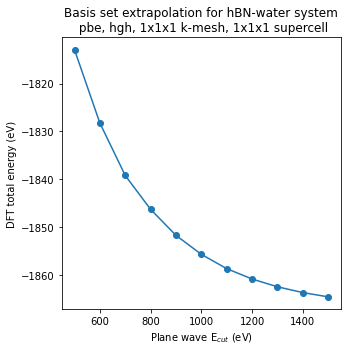

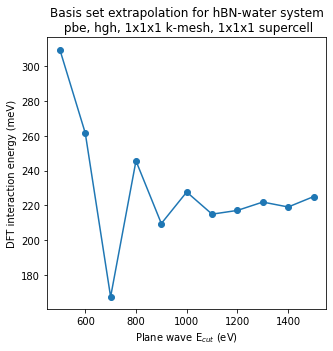

In [61]:
ecp = "hgh"
plot_ecut_above = 400
df_to_plot = df[df.ecp == ecp].copy()
basis_sizes, int_energies = compute_int_energy(df_to_plot)
for plot_int_energy in [False, True]:
    plot_basis_set_extrapolation(
        df_to_plot[df_to_plot.ecut_ev > plot_ecut_above],
        basis_sizes[basis_sizes > plot_ecut_above],
        int_energies[basis_sizes > plot_ecut_above],
        plot_int_energy=plot_int_energy,
    )